In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('./Downloads/project dataset/googleplaystore.csv')

## Data cleaning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#duplicate
df.duplicated().sum()


483

In [6]:
#drop duplicates   
df.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
df = df[df.Category != '1.9']

In [8]:
#missing data
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

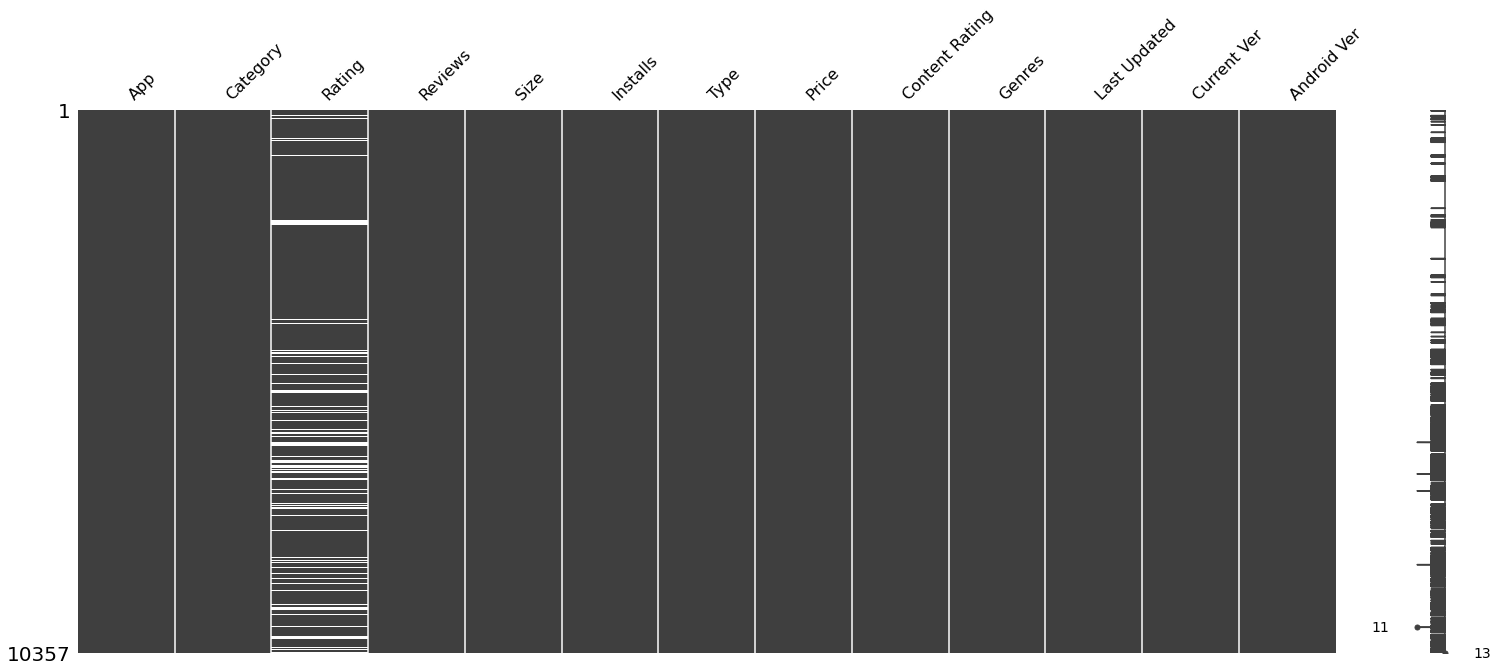

In [9]:
# Visualise the missing ones
msno.matrix(df)


In [10]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
df["Price"]=df['Price'].str.replace('$','').astype(float)

In [12]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(float)


1.000000e+06    1488
1.000000e+07    1132
1.000000e+05    1129
1.000000e+04    1033
1.000000e+03     890
1.000000e+02     710
5.000000e+06     683
5.000000e+05     517
5.000000e+04     474
5.000000e+03     469
1.000000e+01     385
1.000000e+08     369
5.000000e+02     328
5.000000e+07     272
5.000000e+01     204
5.000000e+00      82
1.000000e+00      67
5.000000e+08      61
1.000000e+09      49
0.000000e+00      15
Name: Installs, dtype: int64

In [13]:
df.Rating.describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [15]:
df[~df.Reviews.str.isnumeric()]
df['Reviews'] = pd.to_numeric(df['Reviews'])

## EDA

## NLP

In [19]:
review = pd.read_csv('./Downloads/project dataset/googleplaystore_user_reviews.csv')
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [20]:
review.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in review.Sentiment]
review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,0,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,0,0.25,0.288462
2,10 Best Foods for You,NaN,2,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,0,0.40,0.875000
4,10 Best Foods for You,Best idea us,0,1.00,0.300000
5,10 Best Foods for You,Best way,0,1.00,0.300000
6,10 Best Foods for You,Amazing,0,0.60,0.900000
7,10 Best Foods for You,NaN,2,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",2,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,2,0.00,0.000000


In [48]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
review = review.dropna(subset=['Translated_Review'])


In [31]:
#removing stopwords, unnecessary characters, lemmatization,
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk as nlp


text_list=[]
for i in review.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",str(i))
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [37]:
#bag of words
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000

cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names_out()


Most used words:  ['aborted' 'aborting' 'abortion' 'abou' 'abousolutely' 'abracadabra'
 'abroad' 'abrupt' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely'
 'absolutly' 'absorbing' 'abstract' 'abstraction' 'absurd' 'abt' 'abu'
 'abundance' 'abundant' 'abundantly' 'abuse' 'abused' 'abuser' 'abusing'
 'abusive' 'abysmal' 'abyss' 'ac' 'aca' 'academia' 'acc' 'accasionly'
 'accelent' 'accelerate' 'acceleration' 'accent' 'accentuates' 'accept'
 'acceptable' 'acceptance' 'accepted' 'accepting' 'accepts' 'acces'
 'accesable' 'access' 'accessabilty']


In [49]:
#wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_freq = {}
word_list = [word for line in text_list for word in line.split()]
word_list = [word for word in word_list if len(word) >= 2]
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if not word.lower() in stop_words]
for word in word_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


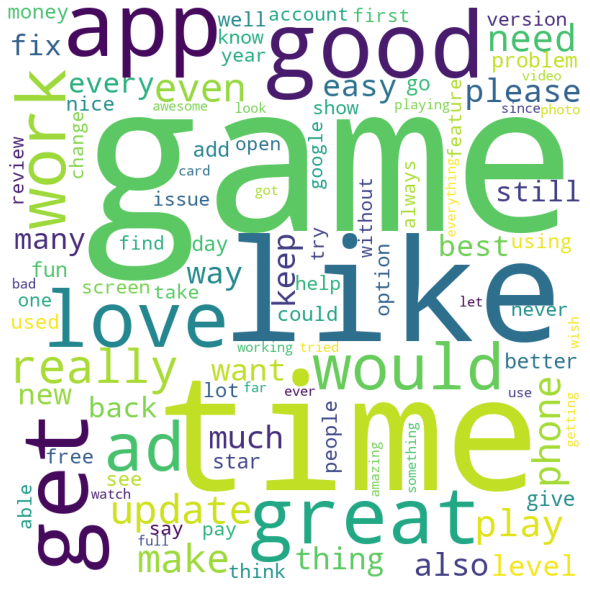

In [50]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_freq)

# plot the WordCloud object 
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [67]:
from collections import Counter
words_counts = Counter(word_list)
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_wordList = []
most_common_CountList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_CountList.append(y)


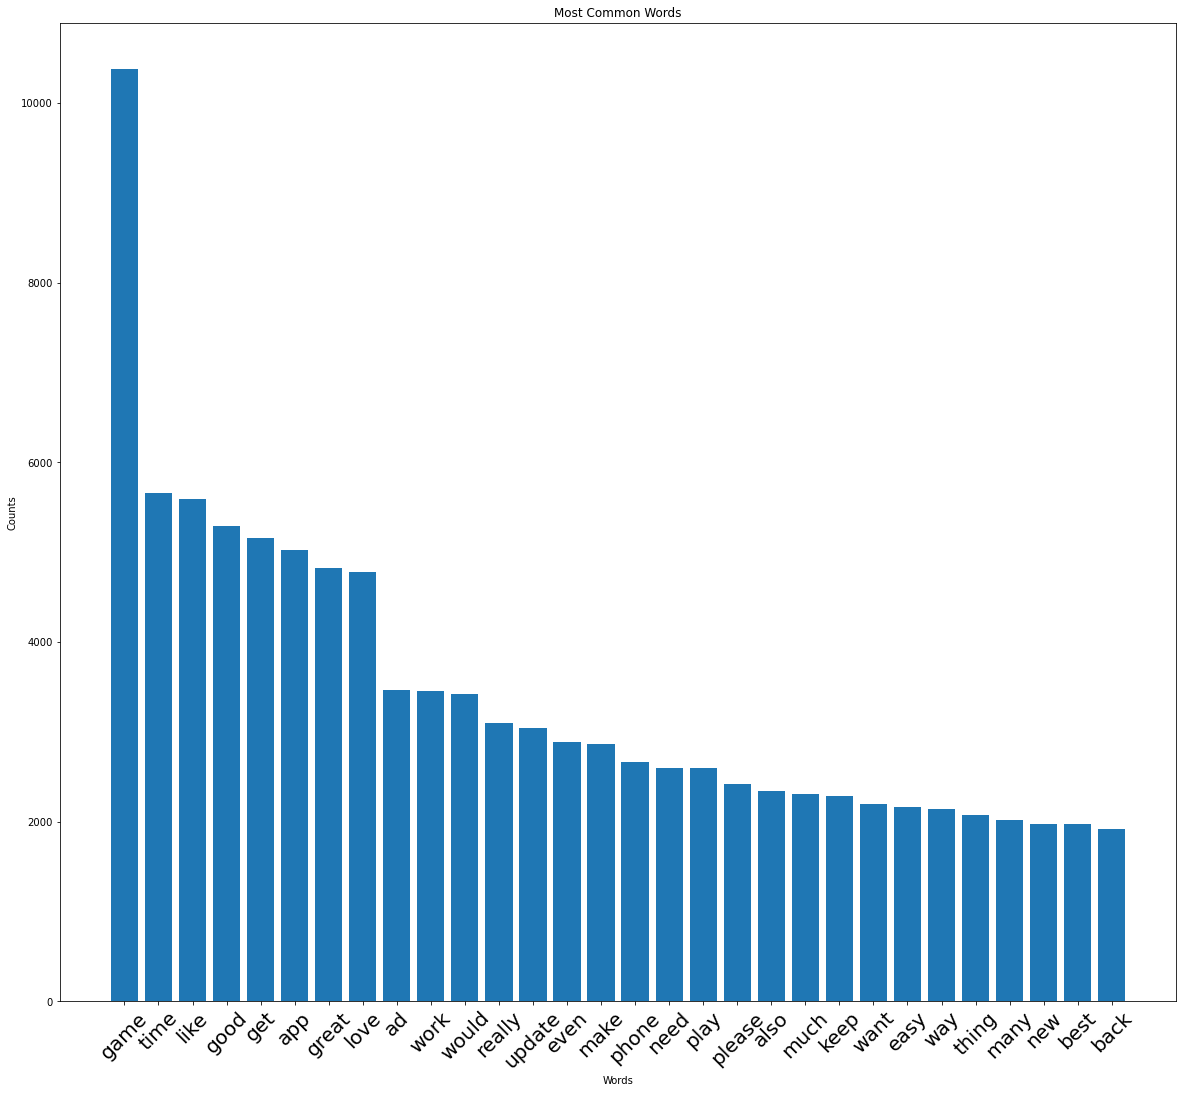

In [70]:
plt.figure(figsize=(20,18))
plt.bar(most_common_wordList[0:30], most_common_CountList[0:30])
# add labels and title to the plot
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words')
plt.xticks(fontsize=20,rotation=45)
# show the plot
plt.show()

## Classification for Modelling

In [71]:
x=sparce_matrix
y=review.Sentiment.values

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10)
random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [75]:
print("Accuracy: ",random.score(x_test,y_test))
y_pred = random.predict(x_test)
y_true = y_test

Accuracy:  0.878306171520171


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

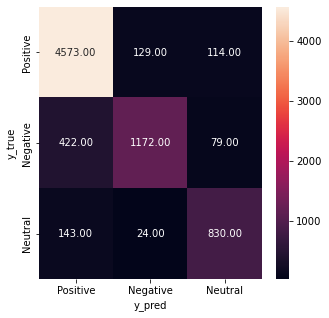

In [77]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ['Positive', 'Negative', 'Neutral']
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = '0.2f')
plt.xlabel('y_pred')
plt.ylabel('y_true')
ax.set_xticklabels(names)
ax.set_yticklabels(names)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4816
           1       0.88      0.70      0.78      1673
           2       0.81      0.83      0.82       997

    accuracy                           0.88      7486
   macro avg       0.86      0.83      0.84      7486
weighted avg       0.88      0.88      0.88      7486

